In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
exercise = pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Calories-Burnt-Prediction-Machine-Learning-main/Calories-Burnt-Prediction-Machine-Learning-main/exercise.csv")

In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories= pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Calories-Burnt-Prediction-Machine-Learning-main/Calories-Burnt-Prediction-Machine-Learning-main/calories.csv")

In [6]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
calories_df = pd.concat([exercise.drop('User_ID',axis=1),calories['Calories']],axis=1)
calories_df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [9]:
calories_df.shape

(15000, 8)

In [10]:
calories_df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Height', ylabel='Weight'>

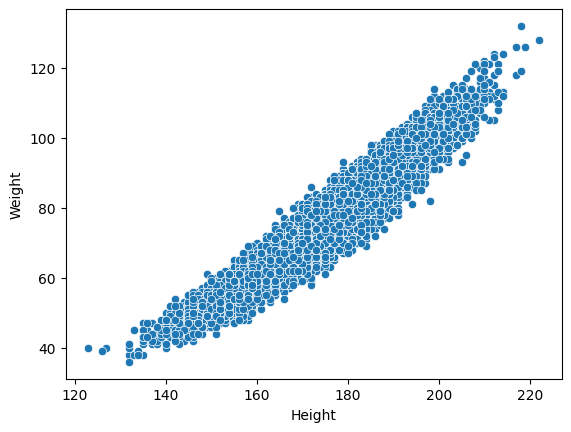

In [12]:
sns.scatterplot(x=calories_df['Height'],y=calories_df['Weight'])

<Axes: xlabel='Duration', ylabel='Heart_Rate'>

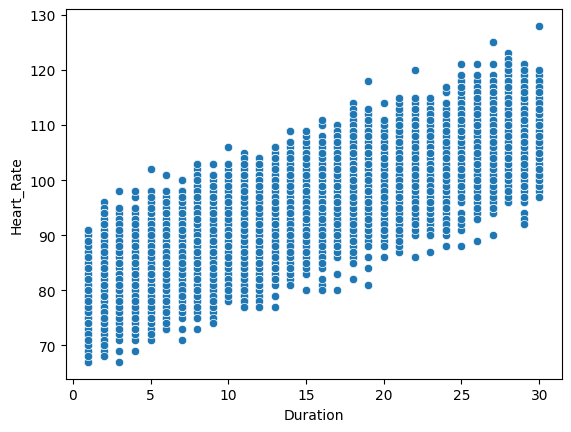

In [13]:
sns.scatterplot(x=calories_df['Duration'],y=calories_df['Heart_Rate'])

<Axes: xlabel='Gender', ylabel='count'>

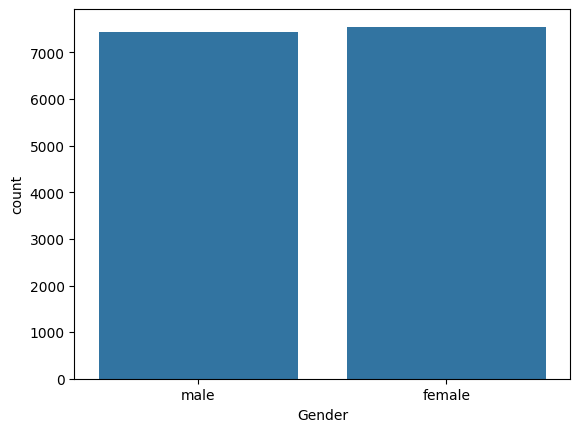

In [14]:
sns.countplot(x=calories_df['Gender'])

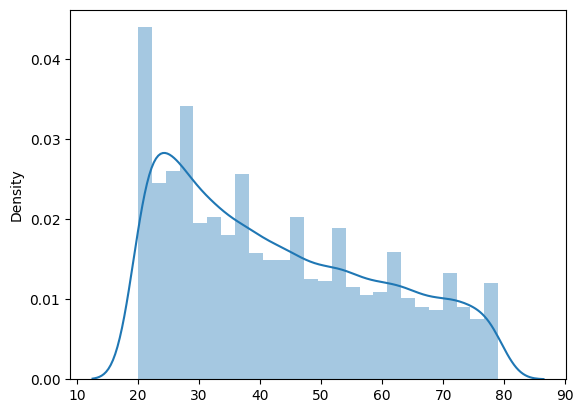

In [15]:
sns.distplot(x=calories_df['Age'])
plt.show()

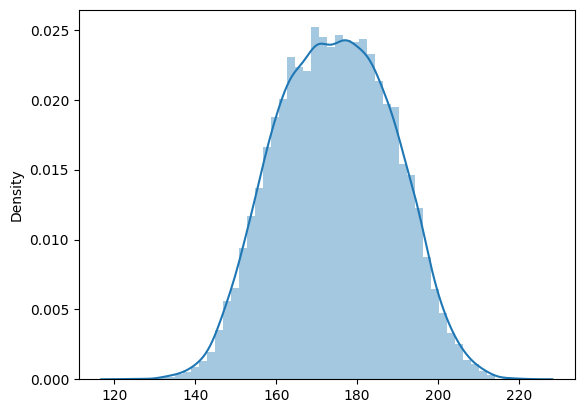

In [16]:
sns.distplot(x=calories_df['Height'])
plt.show()

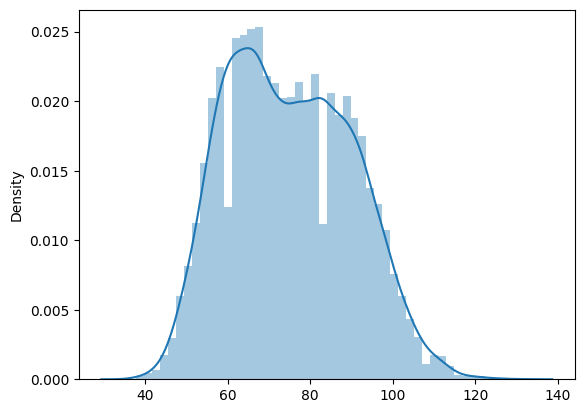

In [17]:
sns.distplot(x=calories_df['Weight'])
plt.show()

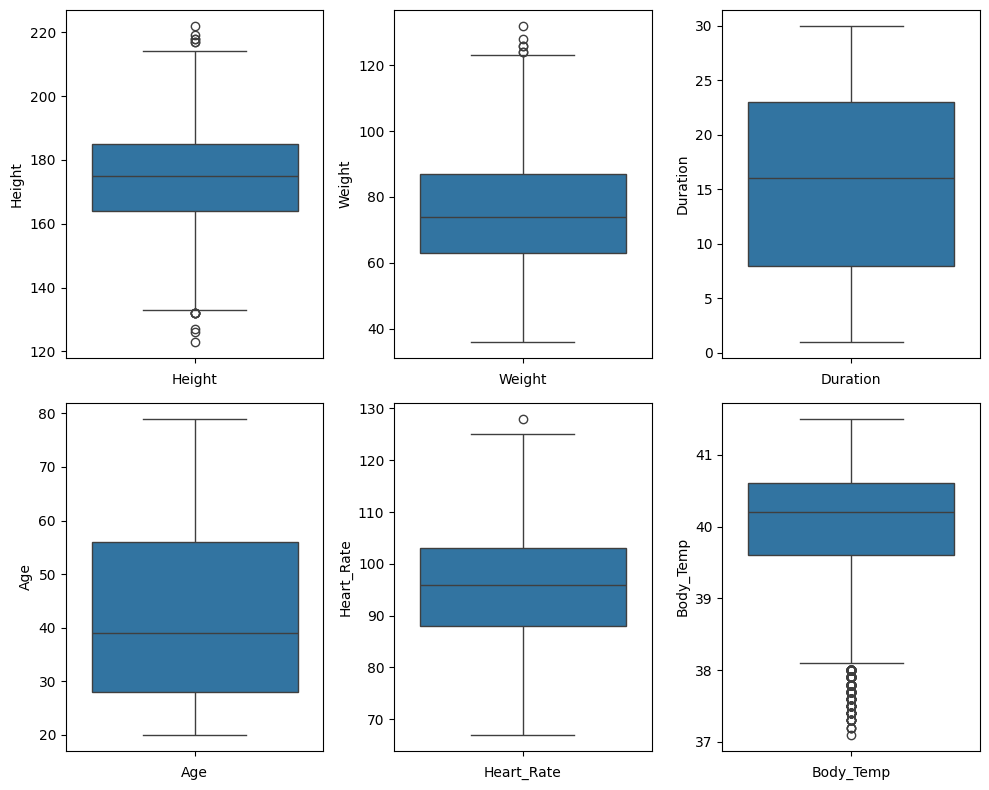

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3, figsize = (10,8))
plt1 = sns.boxplot(calories_df['Height'], ax = axs[0,0]).set(xlabel= 'Height')
plt2 = sns.boxplot(calories_df['Weight'], ax = axs[0,1]).set(xlabel='Weight')
plt3 = sns.boxplot(calories_df['Duration'], ax = axs[0,2]).set(xlabel='Duration')
plt1 = sns.boxplot(calories_df['Age'], ax = axs[1,0]).set(xlabel='Age')
plt2 = sns.boxplot(calories_df['Heart_Rate'], ax = axs[1,1]).set(xlabel='Heart_Rate')
plt3 = sns.boxplot(calories_df['Body_Temp'], ax = axs[1,2]).set(xlabel='Body_Temp')

plt.tight_layout()

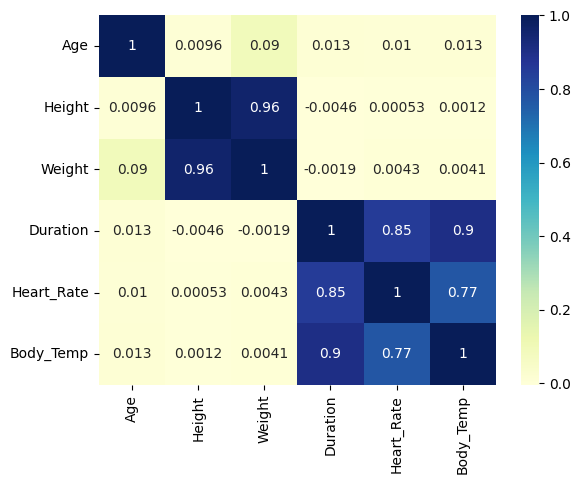

In [20]:
dataplot = sns.heatmap(calories_df[['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']].corr(),cmap='YlGnBu',annot=True)
plt.show()

In [21]:
calories_df.to_csv('calories_data.csv')

In [23]:
calories_df.sample(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
13149,male,33,207.0,110.0,29.0,107.0,40.9,201.0
12010,female,52,168.0,66.0,16.0,101.0,40.5,95.0
7426,female,71,157.0,57.0,21.0,113.0,40.5,161.0
12689,female,44,167.0,69.0,15.0,102.0,40.3,88.0


In [24]:
calories_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [26]:
X = calories_df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','Body_Temp']]
y = calories_df['Calories']

In [27]:
X.shape,y.shape

((15000, 7), (15000,))

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [1,2,3,4,5,6]),
            ('OHE', ohe, [0])
        ],
        remainder='passthrough'
)

In [30]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [1, 2, 3, 4, 5, 6]),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0])])

In [31]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [33]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighbor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGB Regressor': XGBRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name} : R2 score : {r2_score(y_test,y_pred)*100}")

Linear Regression : R2 score : 96.72937151257295
Lasso : R2 score : 96.08993737141111
Ridge : R2 score : 96.72922020054628
KNeighbor : R2 score : 99.35086405032393
Decision Tree Regressor : R2 score : 99.29938567212555
Random Forest Regressor : R2 score : 99.82747914325014
XGB Regressor : R2 score : 99.88680981634738


In [34]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy,y_train)
rf.predict(X_test_dummy)

array([169.86, 191.64,  52.97, ..., 119.88,  19.68, 217.34])

In [35]:
def prediction(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp):
    # Create an array of the input features
    features = np.array([[Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = rf.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

In [36]:
Gender = 'female'
Age = 52
Height = 168.0 
Weight = 66.0
Duration = 16
Heart_Rate = 101.0
Body_Temp = 40.5


result = prediction(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp)

In [ ]:
# female	52	168.0	66.0	16.0	101.0	40.5	95.0

In [37]:
result

array([95.43])

In [38]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))